# TEXT ANALYTICS GROUP ASSIGNMENT #2

#### Group Members: Brooks Beckelman, Zack Bilderback, Dallas Griffin, Estevan Gonzalez, Sean Kessel, Davis Townsend

In [2]:
import pandas as pd
from pandas import Series, DataFrame
%pylab inline

import seaborn as sns

import sklearn
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

Populating the interactive namespace from numpy and matplotlib


In [3]:
yelp = pd.read_csv('YelpData.csv')

In [3]:
# Convert rating to high (4,5) or low (1,2,3) for binary classification
yelp['rating'] = np.where(yelp['stars'] >= 4, 'high','low')
yelp.head(1)

,stars,votes_cool,votes_funny,votes_useful,Cheap,Moderate,Expensive,VeryExpensive,American,Chinese,...,Indian,Italian,Greek,Mediterranean,Mexican,Thai,Vietnamese,Others,Review,rating
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,This location is out of business. I drove by i...,low


## Task A: Model Using Numeric Data Only

### Approach:
To assess the predictive power of the numerical data, we will isolate it from the actual reviews and build a few different models. These models will be fit to a training set of 75% of the data and then used to predict a test set of the remaining 25%. The accuracy of these predictions compared to a base case (predicting all reviews to have a 'high' rating) should give us an idea of the out-of-sample predictive ability of the numerical data. 


In [4]:
# Split data into train and test sets
train, test = train_test_split(yelp, test_size=0.25, random_state=123)

x_train = train.drop(['stars', 'Review', 'rating'], axis=1)
y_train = train['rating']

x_test = test.drop(['stars', 'Review', 'rating'], axis=1)
y_test = test['rating']

### Base Case:
The base case simply predicts all reviews to have a 'high' rating. This approach predicts the rating class correctly for just under 68% of the samples in the data set. Going forward, we will compare the accuracy of our models to this baseline to give us an idea of how well the models are performing.

In [5]:
# Create base case that predicts all reviews to have a 'high' rating
base = ['high']*len(yelp)
base = np.asarray(base)

In [6]:
# Base Case Metrics
print 'Precision:' + str(metrics.precision_score(yelp['rating'], base, average = 'binary', pos_label='high'))
print 'Recall: ' + str(metrics.recall_score(yelp['rating'], base, average = 'binary', pos_label='high'))
print 'Accuracy: ' + str(metrics.accuracy_score(yelp['rating'], base))

Precision:0.677683884194
Recall: 1.0
Accuracy: 0.677683884194


### Logistic Regression:
A logistic regression model using only the numeric data yields an accuracy of about 68.44% on our test set. This is only slightly better than our base case, indicating that the model's predictive power is not very strong.

In [7]:
# Fit logistic regression on training data
logreg = linear_model.LogisticRegression()
logreg_classifier = logreg.fit(x_train, y_train)

# Make predictions for test set
logreg_predict = logreg.predict(x_test)

In [8]:
# Model Metrics
print 'LOGISTIC REGRESSION: '
print 'Precision:' + str(metrics.precision_score(y_test, logreg_predict, average = 'binary', pos_label='high'))
print 'Recall: ' + str(metrics.recall_score(y_test, logreg_predict, average = 'binary', pos_label='high'))
print 'Accuracy: ' + str(metrics.accuracy_score(y_test, logreg_predict))

LOGISTIC REGRESSION: 
Precision:0.689127738735
Recall: 0.978286384977
Accuracy: 0.6844


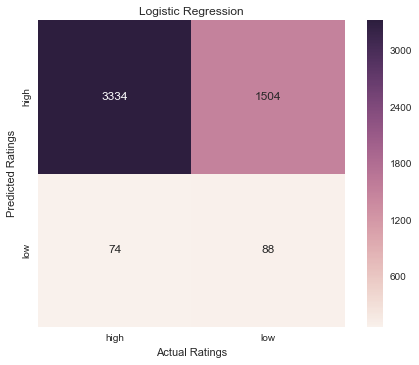

In [9]:
# Fancy boy confusion matrix
mat = metrics.confusion_matrix(y_test, logreg_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=unique(y_test), yticklabels=unique(logreg_predict))
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Logistic Regression')

### Naive Bayes:
A multinomial naive bayes model using only the text data yields an accuracy of about 68.12% for our test set. This, once again, is only slightly greater than the base case, indicating another model without much predictive power.

In [10]:
# Fit naive bayes classifier on training data
mnb = MultinomialNB()
mnb_classifier = mnb.fit(x_train, y_train)

# Make predictions for test set
mnb_predict = mnb.predict(x_test)

In [11]:
# Model Metrics
print 'MULTINOMIAL NAIVE BAYES:'
print 'Precision:' + str(metrics.precision_score(y_test, mnb_predict, average = 'binary', pos_label='high'))
print 'Recall: ' + str(metrics.recall_score(y_test, mnb_predict, average = 'binary', pos_label='high'))
print 'Accuracy: ' + str(metrics.accuracy_score(y_test, mnb_predict))

MULTINOMIAL NAIVE BAYES:
Precision:0.682055399438
Recall: 0.9970657277
Accuracy: 0.6812


C:\Users\Sean\AppData\Local\Continuum\Anaconda2\lib\site-packages\seaborn\matrix.py:142: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if yticklabels == []:


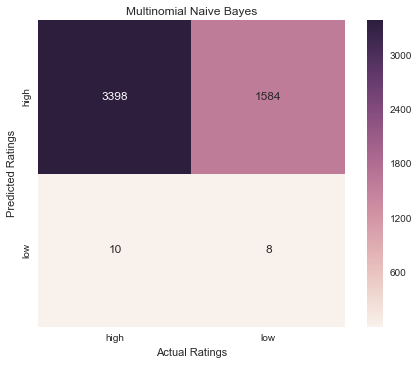

In [12]:
# Fancy boy confusion matrix
mat = metrics.confusion_matrix(y_test, mnb_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=unique(y_test), yticklabels=unique(mnb_predict))
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Multinomial Naive Bayes')

### Conclusion
After comparing the prediction accuracy of both models to that of the base case, it is apparent that not much predictive power is gained from the numerical data. Both the logistic regression and multinomial naive bayes models predicted the test set with an accuracy of just over 68%, less than 1% better than the base case. It appears that the main problem with both models, and thus with the numeric data in general, is that they drastically overpredict the number of 'high' ratings and drastically underpredict the number of 'low' ratings.

## Task B: Model Using Reviews (Text Data) Only

### Approach:
Next, we will try to assess the predictive power of the text data from the actual reviews and compare it to that of the numerical data. To do this, we will isolate the text data, just as we isolated the numerical data in part A, and build a couple of models to make predictions. For time purposes, we will only take a sample of 10,000 reviews rather than use the entire data set when fitting and testing these models. The models will be fit to a training set containing 75% of the sample and then used to predict a test set containing the remaining 25%. We will compare the results to those found in part A to assess the predictive power of the text data relative to that of the numeric data.  

In [13]:
# Take random sample of 10,000 reviews from data set
sample = yelp.sample(10000, random_state=321)

# Split sample into train and test sets
trainB, testB = train_test_split(sample, test_size=0.25, random_state=123)

x_trainB = trainB['Review']
y_trainB = trainB['rating']

x_testB = testB['Review']
y_testB = testB['rating']

In [14]:
# Tokenize reviews in the training and test sets
vectorizer = CountVectorizer(analyzer = 'word', tokenizer= None, preprocessor = None, 
                             stop_words = None, max_features = None)

x_trainB = vectorizer.fit_transform(x_trainB)
x_testB = vectorizer.transform(x_testB)

### Naive Bayes:
A multinomial naive bayes model using the text data yields an accuracy of about 83.24% on our test set. This is significantly higher than the test accuracies that we saw for our two models that were fit using the numeric data. It is also significantly higher than the base case, indicating that the model has some predictive power.  

In [15]:
# Fit naive bayes classifier on training set
mnb_classifierB = MultinomialNB()
mnb_classifierB.fit(x_trainB, y_trainB)

# Make predictions for test set
mnb_predictB = mnb_classifierB.predict(x_testB)

In [16]:
# Model Metrics
print 'MULTINOMIAL NAIVE BAYES:'
print 'Precision:' + str(metrics.precision_score(y_testB, mnb_predictB, average = 'binary', pos_label='high'))
print 'Recall: ' + str(metrics.recall_score(y_testB, mnb_predictB, average = 'binary', pos_label='high'))
print 'Accuracy: ' + str(metrics.accuracy_score(y_testB, mnb_predictB))

MULTINOMIAL NAIVE BAYES:
Precision:0.857612267251
Recall: 0.907826086957
Accuracy: 0.8324


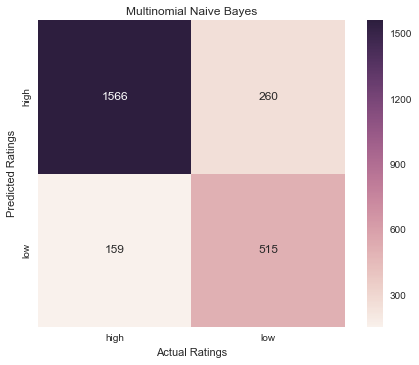

In [17]:
# Fancy boy confusion matrix
mat = metrics.confusion_matrix(y_testB, mnb_predictB)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=unique(y_testB), yticklabels=unique(mnb_predictB))
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Multinomial Naive Bayes')

### Logistic Regression:
A logistic regression model fit on the text data yields an accuracy of about 82.56%. This is on the order of what we saw from the naive bayes model fit on the same data and significantly higher than the models fit on the numeric data. 

In [18]:
# Fit logistic regression on training data
logreg_classifierB = linear_model.LogisticRegression().fit(x_trainB, y_trainB)

# Make predictions for test set
logreg_predictB = logreg_classifierB.predict(x_testB)

In [19]:
# Model Metrics
print 'LOGISTIC REGRESSION:'
print 'Precision:' + str(metrics.precision_score(y_testB, logreg_predictB, average = 'binary', pos_label='high'))
print 'Recall: ' + str(metrics.recall_score(y_testB, logreg_predictB, average = 'binary', pos_label='high'))
print 'Accuracy: ' + str(metrics.accuracy_score(y_testB, logreg_predictB))

LOGISTIC REGRESSION:
Precision:0.863508178229
Recall: 0.887536231884
Accuracy: 0.8256


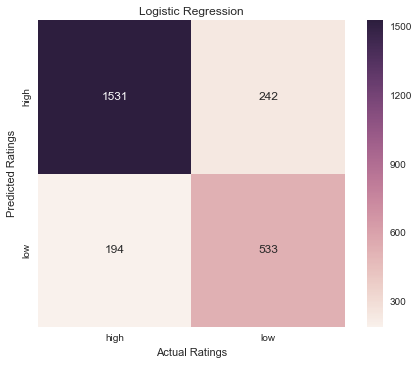

In [20]:
# Fancy boy confusion matrix
mat = metrics.confusion_matrix(y_testB, logreg_predictB)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=unique(y_testB), yticklabels=unique(logreg_predictB))
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Logistic Regression')

### Conclusion
Both models that were fit using the text data performed significantly better than the models that were fit using the numeric data. The multinomial naive bayes model predicted the test set with a slightly higher accuracy than the logistic regression model, but the difference was marginal. These results seem to indicate that the predictive power of the text data (reviews) is significantly greater than that of the numeric data. Different training and test sets were used for part A and part B, so it is possible that some of the difference could be attributed to that. However, given the scale of the differences in accuracy between the numeric models and the text models, the results appear to be conclusive.

## Task C: Hybrid Model (Numeric and Text Data)

### Approach:
Finally, we will fit a model using both the numeric data and the text data. This model will be a hybrid of the multinomial naive bayes model that was fit on the text data and the logistic regression model that was fit on the numeric data. First, we will use the naive bayes model to calculate the probability that each review has a 'high' rating from the text data. Then, we will add this information as a column in our data set that contains all of the numeric data and fit a logistic regression model. We will use this new model to predict the same test set from part B and compare the results to see if the numeric data adds to the predictive power relative to the text.

### Hypothesis:
Our hypothesis is that incorporating the numeric data will improve the accuracy of our model, but only marginally. We saw in part A that the numeric data alone has very little predictive power, so it seems unlikely that it will be able to add much to what we are already getting from the text data.

In [21]:
# Create new training and test sets using same sample from part B
x_trainC = trainB.drop(['stars', 'Review', 'rating'], axis=1)
y_trainC = trainB['rating']

x_testC = testB.drop(['stars', 'Review', 'rating'], axis=1)
y_testC = testB['rating']

In [22]:
# Obtain probabilities of 'high' ratings from naive bayes model using text data
train_scoresB = mnb_classifierB.predict_proba(x_trainB).tolist()
test_scoresB = mnb_classifierB.predict_proba(x_testB).tolist()

train_highScoresB = []
train_lowScoresB = []
for scorePair in train_scoresB:
    train_highScoresB.append(scorePair[0])
    train_lowScoresB.append(scorePair[1])

test_highScoresB = []
test_lowScoresB = []
for scorePair in test_scoresB:
    test_highScoresB.append(scorePair[0])
    test_lowScoresB.append(scorePair[1])

In [23]:
# Add column of probabilities to training and test sets
x_trainC['TextScore'] = train_highScoresB
x_testC['TextScore'] = test_highScoresB

In [24]:
# Fit logistic regression model on training data
logreg = linear_model.LogisticRegression()
logreg_classifierC = logreg.fit(x_trainC, y_trainC)
logreg_predictC = logreg_classifierC.predict(x_testC)

In [25]:
# Model Metrics
print 'Precision:' + str(metrics.precision_score(y_testC, logreg_predictC, average = 'binary', pos_label='high'))
print 'Recall: ' + str(metrics.recall_score(y_testC, logreg_predictC, average = 'binary', pos_label='high'))
print 'Accuracy: ' + str(metrics.accuracy_score(y_testC, logreg_predictC))

Precision:0.860209135938
Recall: 0.906086956522
Accuracy: 0.8336


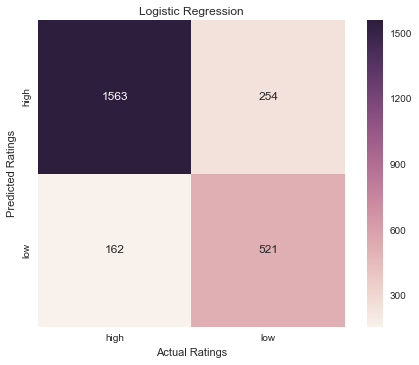

In [26]:
# Fancy boy confusion matrix
mat = metrics.confusion_matrix(y_testC, logreg_predictC)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=unique(y_testC), yticklabels=unique(logreg_predictC))
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Logistic Regression')

### Conclusion:
The model incorporating both the text and numeric data predicted the test set with an accuracy of about 83.36%. As we hypothesized, this is only marginally better than the accuracy of our naive bayes model that was fit on the text data exclusively. It seems that the numeric data adds almost nothing to the predictive power relative to the text data. 

## Task D: Unsupervised Sentiment Analysis

In [27]:
ss = pd.read_csv('YelpNoHeader+results.csv', header = None)
ss.head(1)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,2,2,2,2,1,0,0,0,0,0,...,0,0,0,0,0,0,1,CLOSED This JB s locati...,2,-2


In [28]:
ss['rating'] = np.where(ss[0] >= 4, 'high','low')

In [29]:
train, test = train_test_split(ss, test_size=0.25, random_state=123)

x_train = train[21].reshape(-1,1)
y_train = train['rating'].reshape(-1,1)

x_test = test[21].reshape(-1,1)
y_test = test['rating'].reshape(-1,1)

In [30]:
logreg = linear_model.LogisticRegression()
logreg_classifier = logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_testAccuracy = logreg.score(x_test, y_test)

print 'Logistic Regression Accuracy:', logreg_testAccuracy

Logistic Regression Accuracy: 0.7002


C:\Users\Sean\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Task E: PMI Approach

In [4]:
import nltk
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer

yelpsub = yelp.sample(500)

# Tokenize all job descriptions from sample
yelpsub['tokenized_strip'] = yelpsub.apply(lambda row: row['Review'].decode('utf-8').strip(),axis=1)
yelpsub['tokenized'] = yelpsub.apply(lambda row: nltk.word_tokenize(row['tokenized_strip']),axis=1)

In [32]:
reviews = []
for index, value in yelpsub.iterrows():
    reviews.append(value['tokenized'])

In [33]:
reviews_lower = []
for review in reviews:
    review_lower = []
    for token in review:
        token_lower = token.lower()
        review_lower.append(token_lower)
    reviews_lower.append(review_lower)

In [34]:
reviews = reviews_lower

all_count = 0
for review in reviews:
    for token in review:
        all_count += 1

all_count

75224

In [35]:
single_dict = {}
for review in reviews:
    for token in review:
        if token in single_dict:
            single_dict[token] += 1
        else:
            single_dict[token] = 1

In [36]:
bigrams = []
for review in reviews:
    small_list = []
    for i in range(len(review[0:-1])):
        small_list.append((review[i], review[i+1]))
    bigrams.append(small_list)

bigram_dict = {}
for review in bigrams:
    for tup in review:
        tup_space = ' '.join(tup)
        if tup_space in bigram_dict:
            bigram_dict[tup_space] += 1
        else:
            bigram_dict[tup_space] = 1

In [37]:
bigram_count = 0
for review in bigrams:
    for bigram in review:
        bigram_count += 1
        
bigram_count

74724

In [38]:
import math

zipped = []
for bigram in bigram_dict: 
    bigram_sep = bigram.split()
    p_bi = bigram_dict[bigram] / (bigram_count * 1.0)
    p_word1 = single_dict[bigram_sep[0]] / (all_count * 1.0)
    p_word2 = single_dict[bigram_sep[1]] / (all_count * 1.0)
    pmi = math.log(p_bi / (p_word1 * p_word2) * 1.0)
    
    zipped.append((bigram, bigram_dict[bigram], bigram_sep[0], single_dict[bigram_sep[0]], bigram_sep[1], single_dict[bigram_sep[1]], pmi))

In [39]:
zipped_sorted = sorted(zipped, key=lambda x: x[6])
zipped_sorted.reverse()
for a,b,c,d,e,f,g in zipped_sorted[300:320]:
    print a, g

carries hookah 11.2348946113
sleeved shirts 11.2348946113
incendiary grated 11.2348946113
veija plantains 11.2348946113
nontraditional mexican.okay 11.2348946113
sobbing begins 11.2348946113
hooker heels 11.2348946113
henna tattooing 11.2348946113
ichi ban 11.2348946113
texan inspired 11.2348946113
weeknite din-din 11.2348946113
churro implies 11.2348946113
garbage bins 11.2348946113
doughnut holes 11.2348946113
cliff edge 11.2348946113
unwashed wilted 11.2348946113
blackberry mojito 11.2348946113
cruisers parked 11.2348946113
nearest rubios 11.2348946113
cherry port-a-potty 11.2348946113


## F.

In [6]:
import string
pun = string.punctuation
yelpsub['Review'] = yelpsub['Review'].apply(lambda x: ''.join([i for i in x if i not in pun]))
yelpsub['tokenized_strip'] = yelpsub.apply(lambda row: row['Review'].decode('utf-8').strip(),axis=1)
yelpsub['tokenized'] = yelpsub.apply(lambda row: nltk.word_tokenize(row['tokenized_strip']),axis=1)

In [8]:

yelp_H = yelpsub[yelpsub["stars"]>=4]
yelp_L = yelpsub[yelpsub["stars"]<4]

In [9]:
yelp_H

,stars,votes_cool,votes_funny,votes_useful,Cheap,Moderate,Expensive,VeryExpensive,American,Chinese,...,Italian,Greek,Mediterranean,Mexican,Thai,Vietnamese,Others,Review,tokenized_strip,tokenized
17127,4,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,Great place Service was prompt friendly Food...,Great place Service was prompt friendly Food...,"[Great, place, Service, was, prompt, friendly,..."
19881,5,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,Cute little place with both outdoor with mist...,Cute little place with both outdoor with mist...,"[Cute, little, place, with, both, outdoor, wit..."
431,4,1,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,Great atmosphere and really yummy food If you ...,Great atmosphere and really yummy food If you ...,"[Great, atmosphere, and, really, yummy, food, ..."
7609,5,1,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,This is my absolute favorite place to eat in P...,This is my absolute favorite place to eat in P...,"[This, is, my, absolute, favorite, place, to, ..."
6746,5,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,Holler out to the Eisenbergs who insisted that...,Holler out to the Eisenbergs who insisted that...,"[Holler, out, to, the, Eisenbergs, who, insist..."
12819,5,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,Great food Great service We went for our ann...,Great food Great service We went for our ann...,"[Great, food, Great, service, We, went, for, o..."
19752,5,0,0,2,1,0,0,0,1,0,...,0,0,0,0,0,0,0,Stopped in here when my flight from Phoenix to...,Stopped in here when my flight from Phoenix to...,"[Stopped, in, here, when, my, flight, from, Ph..."
10907,5,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,Me and my husband go here every year for our a...,Me and my husband go here every year for our a...,"[Me, and, my, husband, go, here, every, year, ..."
19107,5,1,0,4,0,0,1,0,1,0,...,0,0,0,0,0,0,1,Ok right off the bat I ll concede the steaks ...,Ok right off the bat I ll concede the steaks ...,"[Ok, right, off, the, bat, I, ll, concede, the..."
8673,4,0,0,1,0,1,0,0,0,1,...,1,0,0,0,0,0,0,This place never disappoints With a mix of It...,This place never disappoints With a mix of It...,"[This, place, never, disappoints, With, a, mix..."


In [10]:
reviews_H = []
for index, value in yelp_H.iterrows():
    reviews_H.append(value['tokenized'])

In [11]:
reviews_L = []
for index, value in yelp_L.iterrows():
    reviews_L.append(value['tokenized'])

In [15]:
flat_H = [item for sublist in reviews_H for item in sublist]

In [16]:
flat_L = [item for sublist in reviews_L for item in sublist]

In [17]:
flat_H = [word for word in flat_H if word not in nltk.corpus.stopwords.words('english')]
flat_L = [word for word in flat_L if word not in nltk.corpus.stopwords.words('english')]

In [18]:
flat_H = [word.lower() for word in flat_H]
flat_L = [word.lower() for word in flat_L]

In [24]:
high_words = pd.Series(flat_H).value_counts()
low_words = pd.Series(flat_L).value_counts()

In [31]:
print "Words used for positive reviews:"
print high_words[:20]
print
print "Words used for negative reviews: "
print low_words[:20]

Words used for positive reviews:
i          1252
the         327
good        253
food        250
place       226
great       211
it          183
like        163
one         145
really      122
time        116
also        112
go          110
service     109
get          98
we           96
back         95
try          95
menu         93
would        92
dtype: int64

Words used for negative reviews: 
i             825
the           195
food          176
good          136
place         132
like          131
service        84
would          80
get            78
one            77
really         77
it             70
we             68
restaurant     68
time           66
back           65
ordered        62
us             58
great          57
go             56
dtype: int64
